# 1.Understanding the Data:

Import necessary libraries (e.g., pandas, matplotlib, seaborn).<br>
Load the COVID-19 dataset.<br>
Display basic information about the dataset (e.g., data types, missing values).<br>

In [1]:
# load required libraries/modules
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
os.chdir("E:/ETLHIVE/Python_Project1")
df = pd.read_csv("covid_19_data.csv")

# Display basic information about the dataset
df


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [2]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
df.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

# 2. Data Cleaning:

In [5]:
Handle missing values.
Convert data types if necessary.
Check for duplicates.

SyntaxError: invalid syntax (4122380074.py, line 1)

In [4]:
# Handle missing values
df['Province/State'].value_counts()

for i in df:
    if df[i].dtypes == 'object':
        m = df[i].mode()[0]
        df[i] = df[i].fillna(m)
    else:
        me = df[i].mean()
        df[i] = df[i].fillna(me)

# Convert data types if necessary ( ObservationDate    datetime64[ns]) change to datetime

# df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Check for duplicates
# print("Number of duplicates:", df.duplicated().sum())


In [5]:
df.isna().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [6]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [7]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [8]:
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 0


# 3. Descriptive Statistics:

Generate descriptive statistics (mean, median, min, max) for numeric columns.<br>
Explore summary statistics for categorical columns.

In [9]:
# Descriptive statistics
df.describe()

# Summary statistics for categorical columns
categorical = []
continuous = []
for i in df:
    if df[i].dtypes == 'object':
        categorical.append(i)
    else:
        continuous.append(i)


In [10]:
df[continuous].describe()

,SNo,ObservationDate,Confirmed,Deaths,Recovered
count,306429.000000,306429,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,2020-11-06 01:54:54.146441728,8.567091e+04,2036.403268,5.042029e+04
min,1.000000,2020-01-22 00:00:00,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,2020-07-30 00:00:00,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,2020-11-10 00:00:00,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,2021-02-18 00:00:00,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,2021-05-29 00:00:00,5.863138e+06,112385.000000,6.399531e+06
std,88458.577156,NaN,2.775516e+05,6410.938048,2.015124e+05


In [11]:
df[categorical].describe()

,Province/State,Country/Region,Last Update
count,306429,306429,306429
unique,736,229,1905
top,Unknown,Russia,2021-04-02 15:13:53
freq,82226,30251,239885


# 4. Time Series Analysis:

Analyze the trends in confirmed, deaths, and recovered cases over time.<br>
Create time-based visualizations.

In [44]:
# Time series analysis
# groupby 'ObservationDate' and apply aggregation functions like sum on deaths,confirmed ,recovered 
df_time = df.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
df_time.head()

# Plot time series data using line plot

# syntax: 
#sns.lineplot(data=df_time, x='ObservationDate', y='Confirmed', label='Confirmed')
# sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths')


,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0


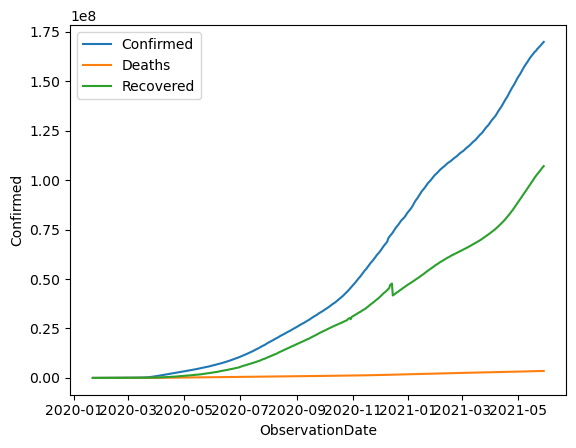

In [53]:
sns.lineplot(data=df_time, x='ObservationDate', y='Confirmed', label='Confirmed')
sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths')
sns.lineplot(data=df_time, x='ObservationDate', y='Recovered', label='Recovered')
plt.show()

# 5. Geographical Analysis:

Analyze the distribution of cases across different countries/regions.<br>
Create geographical visualizations (e.g., world map).

In [55]:
conf = df['Confirmed'].head()
conf

0     1.0
1    14.0
2     6.0
3     1.0
4     0.0
Name: Confirmed, dtype: float64

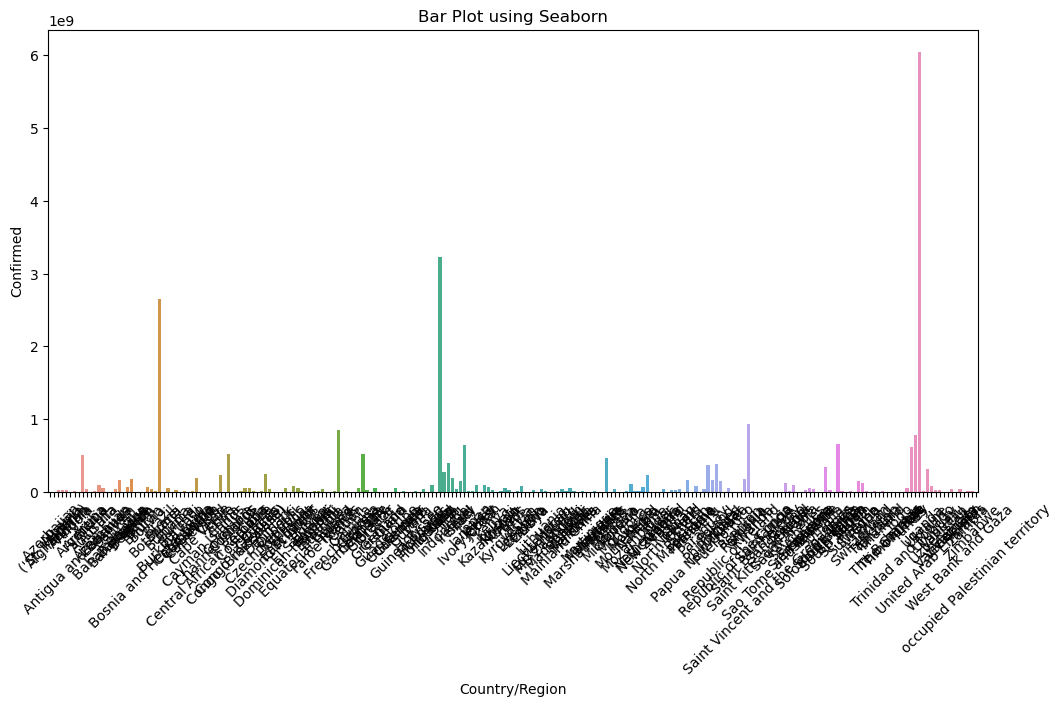

In [56]:
# Geographical analysis
df_country = df.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

# Plot geographical data
plt.figure(figsize=(12, 6))
sns.barplot(x=df_country.index, y='Confirmed', data=df_country)
plt.xlabel('Country/Region')
plt.ylabel('Confirmed')
plt.title('Bar Plot using Seaborn')
plt.xticks(rotation=45, ha='center')
plt.show()

In [57]:
df_country.index

Index([' Azerbaijan', '('St. Martin',)', 'Afghanistan', 'Albania', 'Algeria',
       'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uzbekistan', 'Vanuatu', 'Vatican City', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Yemen', 'Zambia', 'Zimbabwe',
       'occupied Palestinian territory'],
      dtype='object', name='Country/Region', length=229)

In [58]:
print(df['Confirmed'].unique())
print(df['Recovered'].unique())

[1.00000e+00 1.40000e+01 6.00000e+00 ... 6.16110e+04 8.75500e+04
 3.91559e+05]
[0.0000e+00 2.8000e+01 2.0000e+00 ... 5.8882e+04 9.5289e+04 8.3790e+04]


In [59]:
df.isnull().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

# 6. Correlation Analysis:

Examine the correlation between different numeric variables.

In [ ]:
# Correlation analysis between confirmed,deaths and recovered
#x = pd.crosstab(df['Confirmed'], df['Recovered'])

# Plot the crosstab on a heatmap
#sns.heatmap(cross_table, annot=True, cmap='coolwarm', fmt='d', linewidths=.5)
#plt.title('Crosstab Heatmap between Confirmed and Recovered')
#plt.show()

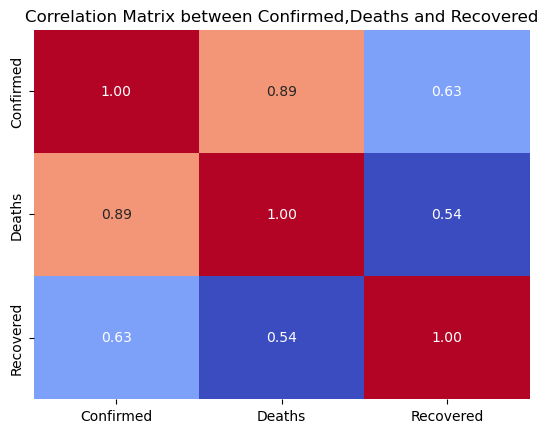

In [60]:
x = df[['Confirmed', 'Deaths', 'Recovered']].corr()
sns.heatmap(x, annot=True, cmap='coolwarm',cbar=False, fmt=".2f")
plt.title('Correlation Matrix between Confirmed,Deaths and Recovered')
plt.show()


# 7. Advanced Analysis:

Explore advanced visualizations or statistical tests based on the specific questions you want to answer.

In [61]:
# Calculate the total number of confirmed cases, deaths, and recoveries for each country/region.

totals_by_country = df.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
totals_by_country

,Confirmed,Deaths,Recovered
Country/Region,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,17026442.0,669075.0,13464399.0
Albania,19768869.0,375955.0,13945256.0
Algeria,27684358.0,834464.0,18959299.0
...,...,...,...
West Bank and Gaza,41819444.0,440378.0,37003116.0
Yemen,962066.0,237613.0,506523.0
Zambia,13493953.0,205990.0,12625626.0


In [62]:
# Identify the countries/regions with the highest number of confirmed cases, deaths, and recoveries.
# For confirmed cases
max_confirmed = totals_by_country['Confirmed'].max()
country_with_max_confirmed = totals_by_country[totals_by_country['Confirmed'] == max_confirmed]
print("Country/Region with the highest number of confirmed cases:")
print(country_with_max_confirmed)

# For deaths
max_deaths = totals_by_country['Deaths'].max()
country_with_max_deaths = totals_by_country[totals_by_country['Deaths'] == max_deaths]
print("\nCountry/Region with the highest number of deaths:")
print(country_with_max_deaths)

# For recoveries
max_recoveries = totals_by_country['Recovered'].max()
country_with_max_recoveries = totals_by_country[totals_by_country['Recovered'] == max_recoveries]
print("\nCountry/Region with the highest number of recoveries:")
print(country_with_max_recoveries)


Country/Region with the highest number of confirmed cases:
                   Confirmed       Deaths    Recovered
Country/Region                                        
US              6.049146e+09  123303762.0  503370956.0

Country/Region with the highest number of deaths:
                   Confirmed       Deaths    Recovered
Country/Region                                        
US              6.049146e+09  123303762.0  503370956.0

Country/Region with the highest number of recoveries:
                   Confirmed      Deaths     Recovered
Country/Region                                        
India           3.226768e+09  44424723.0  2.900590e+09


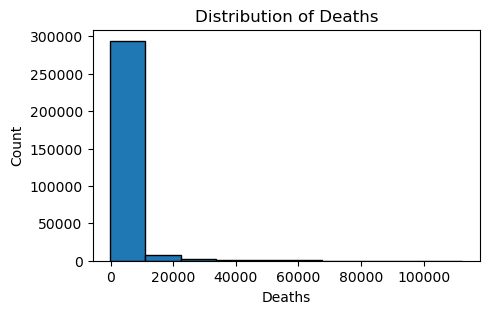

In [63]:
# Visualize the distribution of deaths using bar chart
plt.figure(figsize=(5, 3))
plt.title('Distribution of Deaths')
plt.hist(df['Deaths'],edgecolor="black")
plt.xlabel('Deaths')
plt.ylabel('Count')
plt.show()

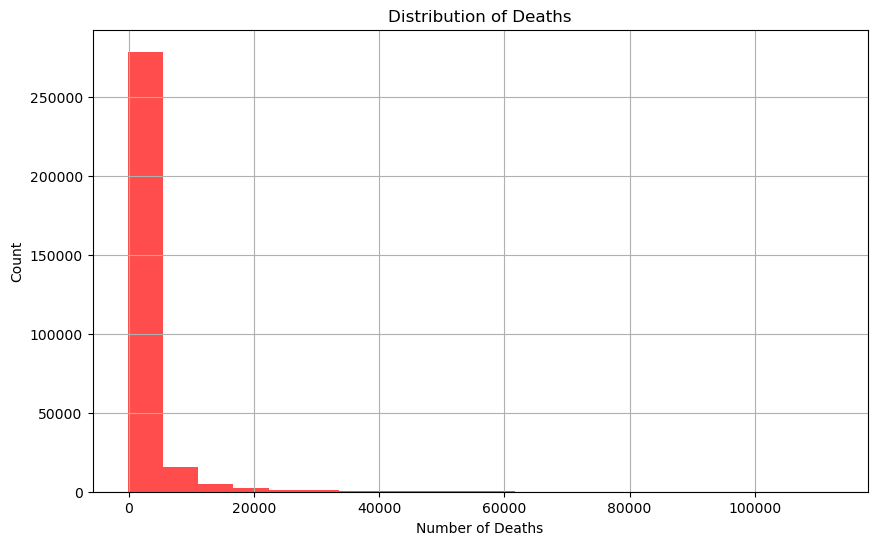

In [64]:
data = df['Deaths'] 
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, color='red', alpha=0.7)
plt.title('Distribution of Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Count')
plt.grid(True)
plt.show()